# 1. Import Modul dan Model

- Menampilkan informasi tentang GPU NVIDIA yang terpasang di sistem

In [ ]:
!nvidia-smi

Wed Mar 26 08:36:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

- Melakukan proses instalasi modul `roboflow` sehingga dapat dilakukan proses download dataset pada laman tersebut

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BS1qBAWgkWEmq6PCikBR")
project = rf.workspace("roboflow-universe-projects").project("construction-site-safety")
version = project.version(28)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Construction-Site-Safety-28 in yolov8:: 100%|██████████| 5614/5614 [00:01<00:00, 4187.55it/s]


- Melakukan proses instalasi modul `ultralytics`

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

- Melakukan proses import model `YOLO` melalui modul `ultralytics`

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 2. Proses Pelatihan dan Pengujian Model YOLO

- Import Modul yang Diperlukan untuk Download File/Folder

In [ ]:
import shutil
from google.colab import files

## Model YOLOv8s (*small*)

### Pelatihan Model

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Construction-Site-Safety-28/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Construction-Site-Safety-28/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

### Pengujian Model yang Terbaik (`best.pt`)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/Construction-Site-Safety-28/data.yaml

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Construction-Site-Safety-28/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.92it/s]
                   all        114        697      0.922      0.771      0.843      0.559
               Hardhat         42         79      0.954      0.783      0.906      0.618
                  Mask         19         21      0.951      0.925      0.955      0.707
            NO-Hardhat         37         69       0.82      0.595      0.703      0.429
               NO-Mask         44         74      0.904      0.662      0.696      0.409
        NO-Safety Vest         56        106      0.955      0.726      0.836      0.522
                Person         84   

### Menyimpan Hasil Pelatihan dan Pengujian Model

In [ ]:
downloaded_file_path = '/content/runs/detect/train2'
shutil.make_archive(downloaded_file_path, 'zip', downloaded_file_path)
files.download(downloaded_file_path + '.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model YOLOv8m (*medium*)

### Pelatihan Model

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Construction-Site-Safety-28/data.yaml epochs=50 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 283MB/s]
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Construction-Site-Safety-28/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

### Pengujian Model yang Terbaik

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/Construction-Site-Safety-28/data.yaml

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Construction-Site-Safety-28/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.66it/s]
                   all        114        697      0.899      0.809      0.863      0.599
               Hardhat         42         79      0.957      0.849      0.918      0.648
                  Mask         19         21      0.969      0.952      0.962      0.769
            NO-Hardhat         37         69       0.92      0.671       0.79      0.474
               NO-Mask         44         74      0.857      0.662      0.717      0.445
        NO-Safety Vest         56        106      0.931       0.76      0.857      0.582
                Person         84   

### Menyimpan Hasil Pelatihan dan Pengujian Model

In [ ]:
downloaded_file_path = "/content/runs/detect/train3"
shutil.make_archive(downloaded_file_path, 'zip', downloaded_file_path)
files.download(downloaded_file_path + '.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Pelatihan Model YOLOv8l (*large*)

### Pelatihan Model

In [5]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/Construction-Site-Safety-28/data.yaml epochs=50 imgsz=640

100% 83.7M/83.7M [00:00<00:00, 337MB/s]
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Construction-Site-Safety-28/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

### Pengujian Model yang Terbaik

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Construction-Site-Safety-28/data.yaml

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,614,318 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/Construction-Site-Safety-28/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.43it/s]
                   all        114        697      0.943      0.807      0.867      0.615
               Hardhat         42         79      0.981      0.835      0.928      0.656
                  Mask         19         21      0.942      0.952      0.959      0.778
            NO-Hardhat         37         69      0.878      0.628      0.789      0.472
               NO-Mask         44         74      0.923      0.689      0.718      0.485
        NO-Safety Vest         56        106      0.954      0.777      0.852      0.578
                Person         84 

### Menyimpan Hasil Pelatihan dan Pengujian Model

In [8]:
import shutil
from google.colab import files

downloaded_file_path = "/content/runs/detect/train"
shutil.make_archive(downloaded_file_path, 'zip', downloaded_file_path)
files.download(downloaded_file_path + '.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Implementasi Model pada Data Video

- Melakukan deteksi APD pada sampel data video


0: 384x640 2 Hardhats, 2 NO-Masks, 1 NO-Safety Vest, 2 Persons, 1 Safety Vest, 1990.5ms
Safety Vest
Person
Person
Hardhat
Hardhat
NO-Mask
NO-Mask
NO-Safety Vest
Speed: 6.2ms preprocess, 1990.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


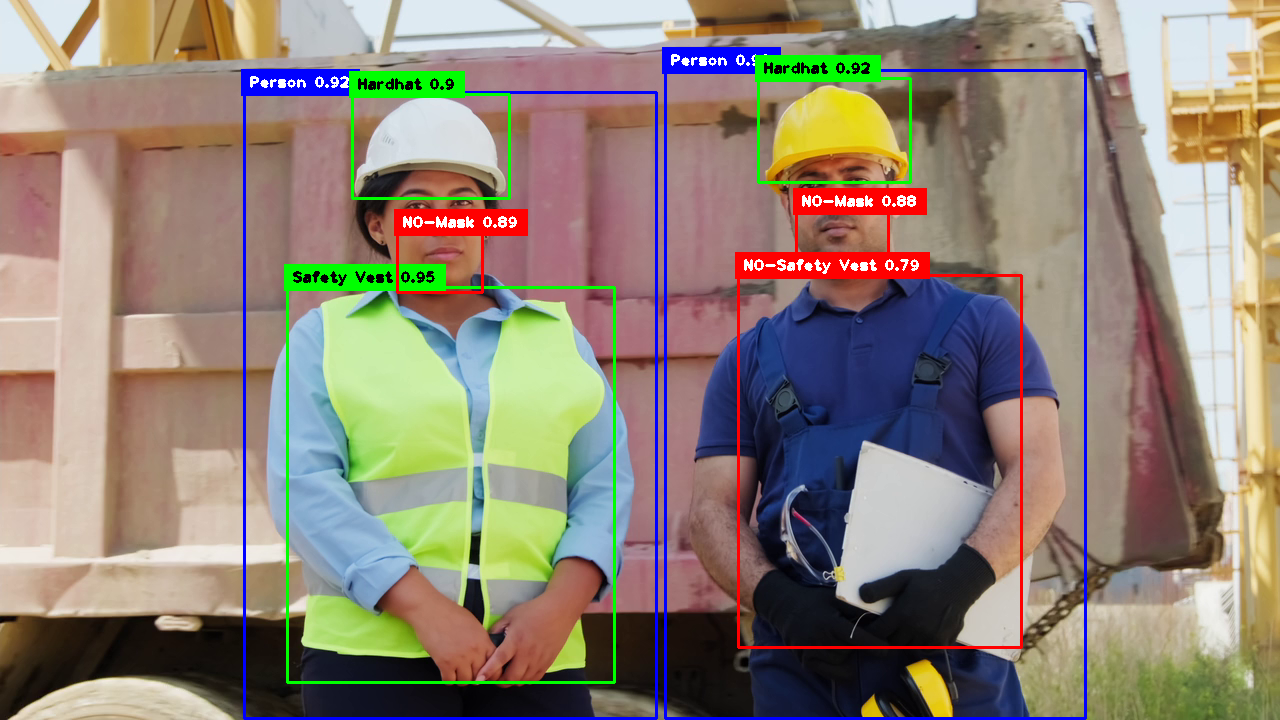


0: 384x640 2 Hardhats, 2 NO-Masks, 1 NO-Safety Vest, 2 Persons, 1 Safety Vest, 1968.1ms
Safety Vest
Person
Person
Hardhat
Hardhat
NO-Mask
NO-Mask
NO-Safety Vest
Speed: 3.5ms preprocess, 1968.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


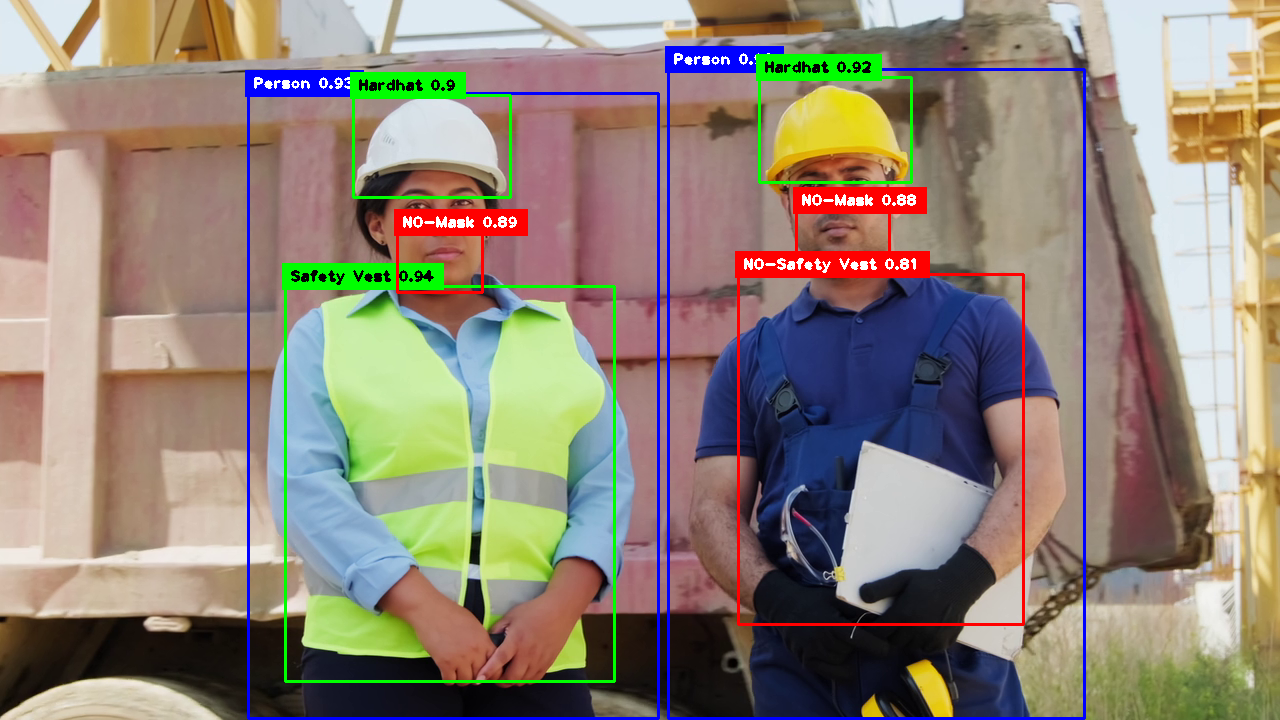


0: 384x640 2 Hardhats, 2 NO-Masks, 1 NO-Safety Vest, 2 Persons, 1 Safety Vest, 1973.1ms
Safety Vest
Person
Person
Hardhat
Hardhat
NO-Mask
NO-Mask
NO-Safety Vest
Speed: 3.3ms preprocess, 1973.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


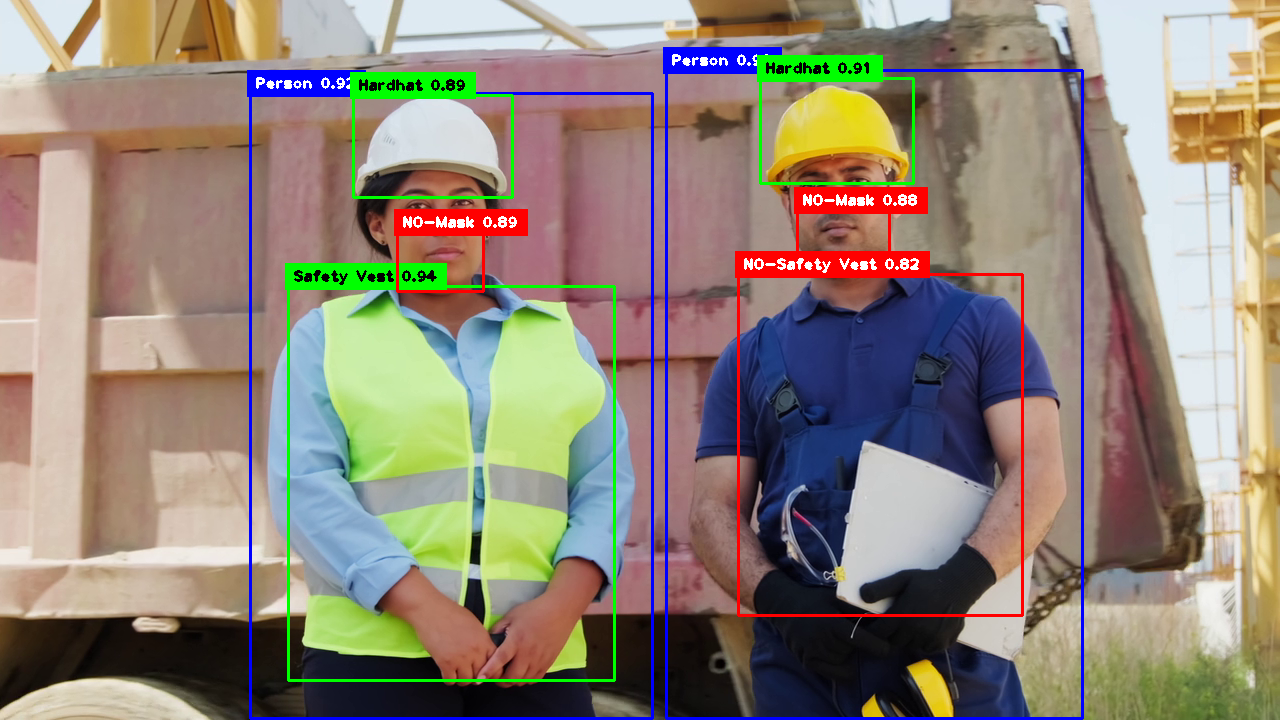


0: 384x640 2 Hardhats, 2 NO-Masks, 1 NO-Safety Vest, 2 Persons, 1 Safety Vest, 2685.4ms
Safety Vest
Person
Person
Hardhat
Hardhat
NO-Mask
NO-Mask
NO-Safety Vest
Speed: 3.3ms preprocess, 2685.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


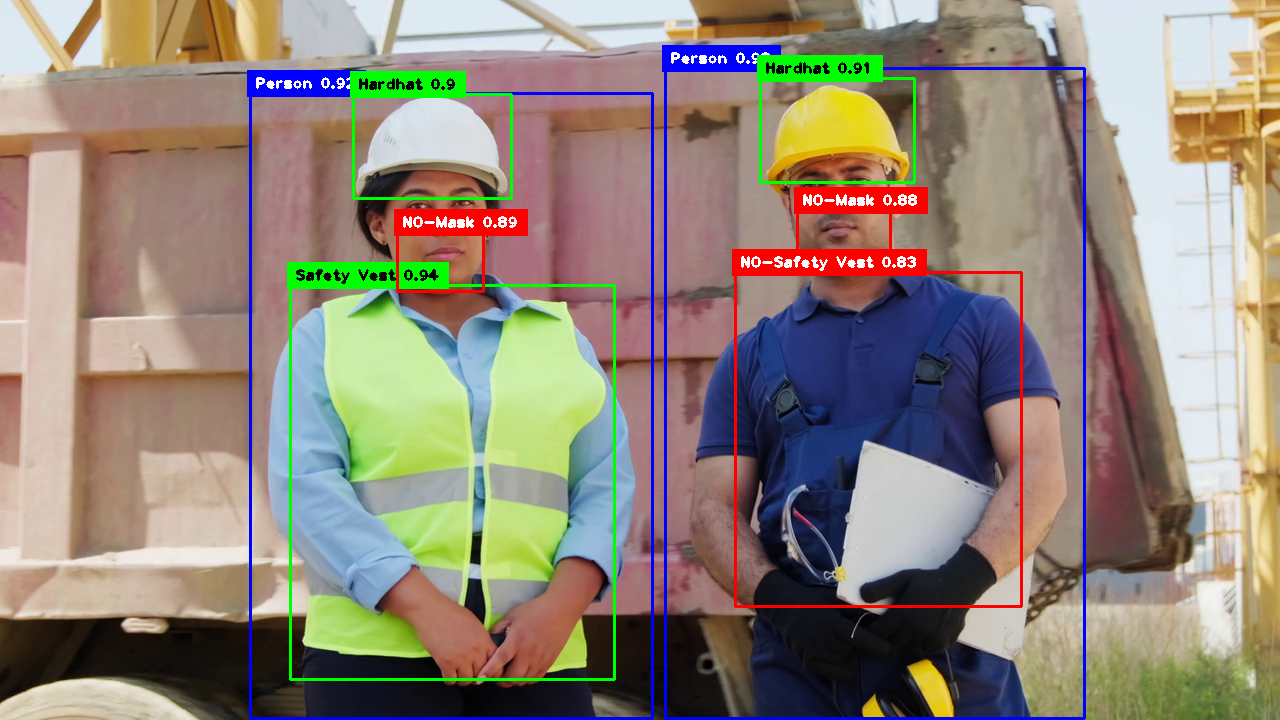


0: 384x640 2 Hardhats, 2 NO-Masks, 1 NO-Safety Vest, 2 Persons, 1 Safety Vest, 2525.1ms
Safety Vest
Person
Person
Hardhat
Hardhat
NO-Mask
NO-Mask
NO-Safety Vest
Speed: 3.0ms preprocess, 2525.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


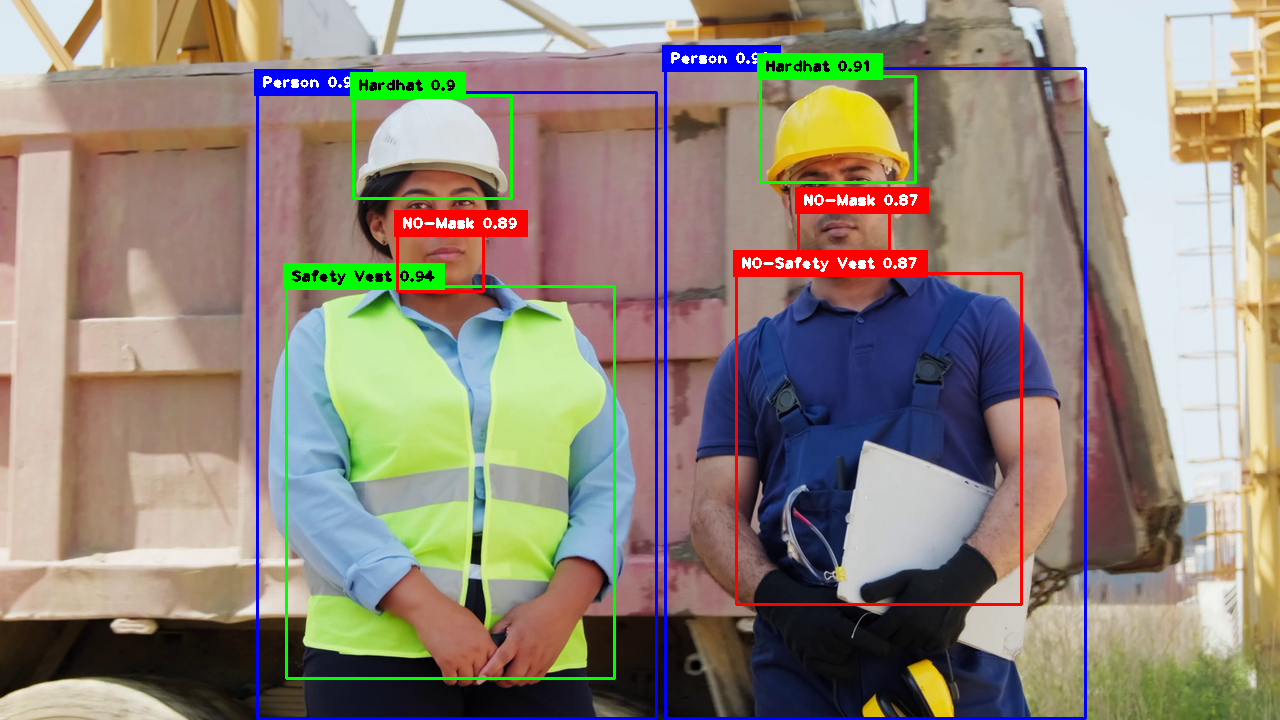

In [5]:
# Personal Protective Equipment (PPE) / Alat Pelindung Diri (APD)
!pip install cvzone
from google.colab.patches import cv2_imshow # Import cv2_imshow

from ultralytics import YOLO
import cv2
import cvzone
import math

# # Membuka file video
video_path = "/content/ppe-2-1.mp4"
cap = cv2.VideoCapture(video_path)


# Import model YOLO
model_path = "/content/best.pt"
model = YOLO(model_path)

# Menentukan jenis-jenis kategori/label data
classNames = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone',
              'Safety Vest', 'machinery', 'vehicle']
myColor = (0, 0, 255)

# Cek apakah video berhasil dibuka
if not cap.isOpened():
    print("Error: Tidak dapat membuka video.")
    exit()

# Membatasi pengambilan video hanya pada 5 frame pertama
frame_count = 0
max_frame = 5

# Menjalankan video
while True:
    ret, frame = cap.read()  # Membaca frame dari video



    if not ret:
        print("Video selesai atau terjadi kesalahan.")
        break

    if frame_count == max_frame:
        break

    # Melakukan deteksi objek pada frame
    results = model(frame, stream=True)

    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Bounding Box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            w, h = x2 - x1, y2 - y1

            # Confidence Level
            conf = math.ceil((box.conf[0] *100)) / 100

            # Label Kategori
            cls = int(box.cls[0])
            currentClass = classNames[cls]
            print(currentClass)

            if conf > 0.5:
                if currentClass == 'NO-Hardhat' or currentClass == 'NO-Safety Vest' or currentClass == 'NO-Mask':
                    myColor = (0, 0, 255)
                    textColor = (255, 255, 255)
                elif currentClass == 'Hardhat' or currentClass == 'Safety Vest' or currentClass == 'Mask':
                    myColor = (0, 255, 0)
                    textColor = (0, 0, 0)
                else:
                    myColor = (255, 0, 0)
                    textColor = (255, 255, 255)

                #print(f'x1 = {x1} dan y1 ={y1}')
                cvzone.putTextRect(frame, f'{classNames[cls]} {conf}',
                                   (max(0, x1+5), max(35, y1-5)), scale=1, thickness=2,
                                   colorB=myColor,colorT=textColor, colorR=myColor, offset=8)
                cv2.rectangle(frame, (x1,y1), (x2,y2), myColor, 2)

    cv2_imshow(frame)  # Menampilkan frame dalam jendela
    frame_count = frame_count + 1

# Membersihkan sumber daya
cap.release()